<a href="https://colab.research.google.com/github/PhucTran112233/ProjectAI/blob/main/Project_AI_Celeb_vn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflowjs

In [1]:
# liên kết Google drive với colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Tải thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import load_model
from keras.models import  Sequential
from keras import regularizers
from keras import layers
import tensorflowjs as tfjs
from keras.layers import BatchNormalization
import cv2

In [6]:
train_data = '/content/drive/MyDrive/AI_4/Train'
val_data =  '/content/drive/MyDrive/AI_4/Validation'

In [7]:
#preprocessing
train_scale = ImageDataGenerator(  rescale=1./255,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,   
                                   height_shift_range=0.2,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   validation_split=0.2)

train_input = train_scale.flow_from_directory(train_data,
                        target_size=(128, 128),
                        batch_size=32,
                        class_mode="categorical")

val_scale = ImageDataGenerator(rescale=1./255)

val_input = val_scale.flow_from_directory(val_data,
                        target_size=(128,128),
                        batch_size=32,
                        class_mode="categorical")

Found 957 images belonging to 20 classes.
Found 95 images belonging to 20 classes.


In [8]:
print("match class: ", train_input.class_indices)
print("Tổng cộng: ",train_input.num_classes)

match class:  {'Huỳnh Phương': 0, 'Lí Hải': 1, 'MC Lại Văn Sâm': 2, 'MC Đại Nghĩa': 3, 'Mạc Văn khoa': 4, 'Misthy': 5, 'NSUT Hồng Vân': 6, 'Nguyễn Huy Hoàng': 7, 'Nguyễn Thị Kim Ngân': 8, 'Nhật Anh Trắng': 9, 'PewPew': 10, 'Phan Mạnh Quỳnh': 11, 'Phạm Nhật Vượng': 12, 'Quang Thắng': 13, 'Ribi Sachi Thuỷ': 14, 'Sơn Tùng MTP': 15, 'TT Nguyễn Xuân Phúc': 16, 'Vân Dung': 17, 'ViruSs': 18, 'Đàm Vĩnh Hưng': 19}
Tổng cộng:  20


In [11]:
#MODEL CNN
model=Sequential()

#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 128 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20,activation='softmax'))  #20 class_name
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 64)      

In [12]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.005)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
face_train = model.fit(train_input,batch_size=32,epochs=150,verbose=1,validation_data=val_input)

Epoch 1/150
30/30 [==============================] - 7s 205ms/step - loss: 0.8595 - accuracy: 0.7346 - val_loss: 0.9348 - val_accuracy: 0.7053
Epoch 2/150
30/30 [==============================] - 6s 202ms/step - loss: 0.7983 - accuracy: 0.7471 - val_loss: 0.7518 - val_accuracy: 0.8105
Epoch 3/150
30/30 [==============================] - 6s 202ms/step - loss: 0.8592 - accuracy: 0.7388 - val_loss: 0.6618 - val_accuracy: 0.8316
Epoch 4/150
30/30 [==============================] - 6s 202ms/step - loss: 0.8267 - accuracy: 0.7304 - val_loss: 0.8067 - val_accuracy: 0.7789
Epoch 5/150
30/30 [==============================] - 7s 222ms/step - loss: 0.8653 - accuracy: 0.7388 - val_loss: 0.6933 - val_accuracy: 0.8105
Epoch 6/150
30/30 [==============================] - 6s 212ms/step - loss: 0.8344 - accuracy: 0.7335 - val_loss: 0.6805 - val_accuracy: 0.8211
Epoch 7/150
30/30 [==============================] - 6s 204ms/step - loss: 0.7698 - accuracy: 0.7774 - val_loss: 0.7475 - val_accuracy: 0.8000

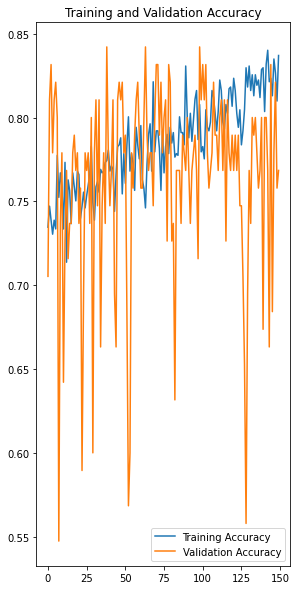

In [18]:
acc = face_train.history['accuracy']
val_acc = face_train.history['val_accuracy']

loss = face_train.history['loss']
val_loss = face_train.history['val_loss']
epochs_range=range(150)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

In [19]:
tfjs.converters.save_keras_model(model,'models')